In [1]:
####################
## Chapter 3 Code ##
####################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading data
marketing_CLV = pd.read_csv('Marketing_Customer_Value_Analysis.csv')
marketing_CLV.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
## Quick exploration of Response
marketing_CLV['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [3]:
## Here we create Engaged from Response
marketing_CLV['Engaged'] = np.where(marketing_CLV['Response'] == 'No', 0, 1)
marketing_CLV['Engaged'].value_counts()

0    7826
1    1308
Name: Engaged, dtype: int64

In [4]:
## Calculating engagement rate
marketing_CLV.groupby('Engaged').count()['Response'] / marketing_CLV.shape[0]

Engaged
0    0.856799
1    0.143201
Name: Response, dtype: float64

In [5]:
## Sales by channels
sales_by_channel = pd.pivot_table(marketing_CLV, values = 'Response', index = 'Sales Channel', columns = 'Engaged', aggfunc = len)

## Changing column labels
sales_by_channel.columns = ['Not Engaged', 'Engaged']
sales_by_channel

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


Text(0.5, 0.98, '')

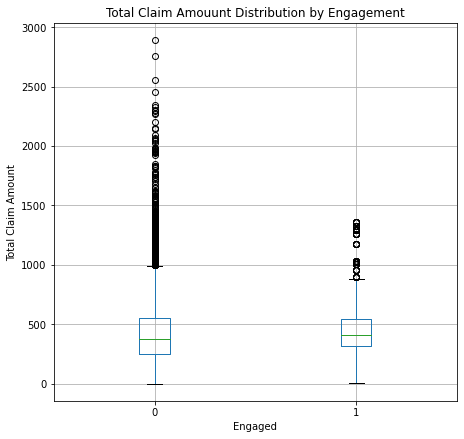

In [6]:
## Total claim amounts by engagement (boxplots)
box_plot = marketing_CLV[['Engaged', 'Total Claim Amount']].boxplot(by = 'Engaged', figsize = (7, 7))

## Changing axes labels and plot title
box_plot.set_xlabel('Engaged')
box_plot.set_ylabel('Total Claim Amount')
box_plot.set_title('Total Claim Amouunt Distribution by Engagement')

plt.suptitle('')

In [ ]:
pip install statsmodels

In [7]:
## Importing statsmodel
import statsmodels.api as sm

## Defining the input variables
var_to_consider = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
                   'Months Since Last Claim', 'Months Since Policy Inception',
                   'Number of Open Complaints', 'Number of Policies', 
                   'Total Claim Amount']

## Builing the logist regression model
logit_md = sm.Logit(marketing_CLV['Engaged'], 
                    marketing_CLV[var_to_consider])

## Extracting model results
result = logit_md.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Tue, 06 Jul 2021   Pseudo R-squ.:                -0.02546
Time:                        23:37:04   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

In [8]:
## Encoding Gender
gender = pd.Categorical(marketing_CLV['Gender'],
                        categories = ['F', 'M'])

## Encoding Education
categories = pd.Categorical(marketing_CLV['Education'],
                            categories = ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'])

In [9]:
## Creating two new variables based on the codes
marketing_CLV['GenderFactorized'] = gender.codes
marketing_CLV['EducationFactorized'] = categories.codes

In [10]:
## Builing the logist regression model
logit_md = sm.Logit(marketing_CLV['Engaged'], marketing_CLV[['GenderFactorized', 'EducationFactorized']])

## Extracting model results
result = logit_md.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Jul 2021   Pseudo R-squ.:                 -0.2005
Time:                        23:38:29   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

In [11]:
## Defining the input variables
var_to_consider = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
                   'Months Since Last Claim', 'Months Since Policy Inception',
                   'Number of Open Complaints', 'Number of Policies', 
                   'Total Claim Amount', 'GenderFactorized', 'EducationFactorized']

## Builing the logist regression model
logit_md = sm.Logit(marketing_CLV['Engaged'], 
                    marketing_CLV[var_to_consider])

## Extracting model results
result = logit_md.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Tue, 06 Jul 2021   Pseudo R-squ.:                -0.02454
Time:                        23:38:44   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""